In [1]:
import torch 
from options.opts import get_training_arguments
from cvnets import get_model
from torchvision.io import read_image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.patches as patches


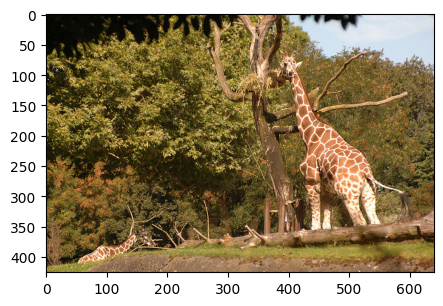

In [2]:
image = cv2.imread("./datasets/coco_2014/train2014/COCO_train2014_000000000025.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
image = image/255.0
image = torch.from_numpy(image)
#image = image.permute(1, 2, 0)
fig, a = plt.subplots(1,1)
fig.set_size_inches(5,5)
a.imshow(image)

In [4]:
import sys
sys.argv=['']
del sys

In [5]:
opts = get_training_arguments()
setattr(opts, "model.detection.n_classes", 81)
for key, val in vars(opts).items():
    print(key, ":", val)

sampler.name : batch_sampler
sampler.bs.crop_size_width : 320
sampler.bs.crop_size_height : 320
sampler.vbs.crop_size_width : 256
sampler.vbs.crop_size_height : 256
sampler.vbs.min_crop_size_width : 160
sampler.vbs.max_crop_size_width : 320
sampler.vbs.min_crop_size_height : 160
sampler.vbs.max_crop_size_height : 320
sampler.vbs.max_n_scales : 5
sampler.vbs.check_scale : 32
sampler.vbs.ep_intervals : [40]
sampler.vbs.scale_inc_factor : 0.25
sampler.vbs.scale_inc : False
dataset.root_train : /datasets/coco_2014
dataset.root_val : /datasets/coco_2014
dataset.root_test : 
dataset.name : coco_ssd
dataset.category : detection
dataset.train_batch_size0 : 64
dataset.val_batch_size0 : 64
dataset.eval_batch_size0 : 1
dataset.workers : 12
dataset.persistent_workers : False
dataset.pin_memory : True
dataset.augmentation.gauss_noise_var : None
dataset.augmentation.jpeg_q_range : None
dataset.augmentation.gamma_corr_range : None
dataset.augmentation.blur_kernel_range : None
dataset.augmentation.tra

In [6]:
model = get_model(opts)
model.eval()

2023-09-13 22:00:46 - LOGS    - Pretrained weights are loaded from results/mobilevitv3_xx_small_e300_7098/run_1/checkpoint_ema_best.pt


SingleShotDetector(
  (encoder): MobileViTv3(
    (conv_1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False, normalization=SyncBatchNorm, activation=Swish, bias=False)
    (layer_1): Sequential(
      (0): InvertedResidual(in_channels=16, out_channels=16, stride=1, exp=2, dilation=1)
    )
    (layer_2): Sequential(
      (0): InvertedResidual(in_channels=16, out_channels=24, stride=2, exp=2, dilation=1)
      (1): InvertedResidual(in_channels=24, out_channels=24, stride=1, exp=2, dilation=1)
      (2): InvertedResidual(in_channels=24, out_channels=24, stride=1, exp=2, dilation=1)
    )
    (layer_3): Sequential(
      (0): InvertedResidual(in_channels=24, out_channels=64, stride=2, exp=2, dilation=1)
      (1): MobileViTv3Block(
      	conv_in_dim=64, conv_out_dim=64, dilation=1, conv_ksize=3
      	patch_h=2, patch_w=2
      	transformer_in_dim=64, transformer_n_heads=4, transformer_ffn_dim=128, dropout=0.05, ffn_dropout=0.0, attn_dropout=0.0, blocks=2
   

In [105]:
device = torch.device("cpu")
model = get_model(opts)
model.load_state_dict(torch.load("./results/checkpoint_ema_best.pt", map_location="cpu"))
model.to("cpu")

2023-09-12 22:52:28 - LOGS    - Pretrained weights are loaded from results/mobilevitv3_xx_small_e300_7098/run_1/checkpoint_ema_best.pt


SingleShotDetector(
  (encoder): MobileViTv3(
    (conv_1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False, normalization=SyncBatchNorm, activation=Swish, bias=False)
    (layer_1): Sequential(
      (0): InvertedResidual(in_channels=16, out_channels=16, stride=1, exp=2, dilation=1)
    )
    (layer_2): Sequential(
      (0): InvertedResidual(in_channels=16, out_channels=24, stride=2, exp=2, dilation=1)
      (1): InvertedResidual(in_channels=24, out_channels=24, stride=1, exp=2, dilation=1)
      (2): InvertedResidual(in_channels=24, out_channels=24, stride=1, exp=2, dilation=1)
    )
    (layer_3): Sequential(
      (0): InvertedResidual(in_channels=24, out_channels=64, stride=2, exp=2, dilation=1)
      (1): MobileViTv3Block(
      	conv_in_dim=64, conv_out_dim=64, dilation=1, conv_ksize=3
      	patch_h=2, patch_w=2
      	transformer_in_dim=64, transformer_n_heads=4, transformer_ffn_dim=128, dropout=0.05, ffn_dropout=0.0, attn_dropout=0.0, blocks=2
   

In [106]:
image_input = torch.unsqueeze(np.transpose(image, (2,1,0)),0)

In [107]:
image_input.shape

torch.Size([1, 3, 640, 426])

In [108]:
target = model.predict(image_input)

In [111]:
target

DetectionPredTuple(labels=tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  3,  3,  3,  3,  3,  3,  8, 10, 10, 10, 10, 14, 14, 14, 14,
        15, 17, 20, 25, 26, 27, 27, 27, 27, 27, 27, 28, 28, 29, 30, 31, 31, 33,
        33, 35, 39, 40, 42, 43, 46, 46, 46, 46, 51, 57, 57, 57, 57, 57, 57, 57,
        57, 61, 62, 62, 63, 64, 64, 64, 64, 67, 67, 68, 68, 68, 68, 72, 72, 74,
        74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 77]), scores=tensor([0.7432, 0.7169, 0.4533, 0.2041, 0.1469, 0.1246, 0.1171, 0.0962, 0.0916,
        0.0816, 0.0793, 0.0785, 0.0736, 0.0729, 0.0701, 0.0688, 0.0681, 0.0659,
        0.0654, 0.0653, 0.0633, 0.0627, 0.0623, 0.0604, 0.0603, 0.0594, 0.0584,
        0.0575, 0.0566, 0.0549, 0.0542, 0.0540, 0.0531, 0.0516, 0.0513, 0.0509,
        0.0505, 0.0503, 0.0501, 0.9755, 0.1181, 0.0597, 0.0568, 0.0564, 0.0521,
        0.0731, 0.1744, 0.0558, 0

In [109]:
teg = {}
teg['boxes'] = target[2].numpy()

0.3725939 0.33443734 0.62314546 0.7960131
-0.005392164 0.047570646 0.14234039 0.3427534
0.72523344 0.25151008 0.19074488 0.38876587
0.054521263 0.4384442 0.75838345 0.48046255
0.71090186 -0.17141664 0.31635237 0.70341533
-0.03969863 -0.060575925 0.22548676 0.31136325
0.77407336 0.28506088 0.13436139 0.1645931
0.7188777 0.5559522 0.08169544 0.050781846
0.85875994 0.2555295 0.022161245 0.06133932
0.28337032 0.5362264 0.20610803 0.31407237
0.8624199 0.24791645 0.028704882 0.059892014
0.7451886 0.5639697 0.024686098 0.035234094
0.5751173 0.101718314 0.057376027 0.15855393
0.85692084 0.22707333 0.048005223 0.072314724
0.5591362 0.86238015 0.046549678 0.06506634
0.2831748 0.42944273 0.058202446 0.13802353
0.8082514 0.23908429 0.054454565 0.094622836
0.8318895 0.24392547 0.060450554 0.09562327
0.7169381 -0.057908088 0.24183583 0.28543067
0.5361236 0.7921572 0.16086447 0.20958197
0.740883 0.56695086 0.036280394 0.042304397
0.7867691 0.46825698 0.22363561 0.6477425
0.5444439 0.2086784 0.4831624

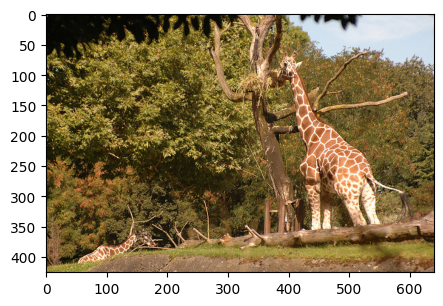

In [110]:
def plot_img_bbox(img, target):
    fig, a = plt.subplots(1,1)
    fig.set_size_inches(5,5)
    a.imshow(img)
    for box in (target['boxes']):
        x, y, width, height = box[0], box[1], abs(box[2]-box[0]), abs(box[3]-box[1])
        print(x,y,width,height, sep=" ")
        rect = patches.Rectangle((x,y), width, height,
                                 linewidth=2, edgecolor = 'r', facecolor='none')
        a.add_patch(rect)
    plt.show()
    
plot_img_bbox(image, teg)